In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

train_df=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s3e8/train.csv")
test_df=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s3e8/test.csv")

In [2]:
train_df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [3]:
train_df.describe(include='all')

,id,carat,cut,color,clarity,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573,193573,193573,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,92454,44391,53272,NaN,NaN,NaN,NaN,NaN,NaN
mean,96786.000000,0.790688,NaN,NaN,NaN,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,NaN,NaN,NaN,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,NaN,NaN,NaN,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,NaN,NaN,NaN,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,NaN,NaN,NaN,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,NaN,NaN,NaN,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000


In [4]:
train_df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
test_df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

The target in this training set is the gem price described as 'price' and being a float value. Features are both numerical and categorical. Numerical features are: 'carat', 'x', 'y', 'z', 'depth', 'table'. Categorical ones: 'cut', 'color', 'clarity'. The additional file descirbes each feature:
- 'carat': Carat weight of the cubic zirconia
- 'cut':  Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
- 'color':  Colour of the cubic zirconia.With D being the best and J the worst.
- 'clarity':  cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
- 'depth':  The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
- 'table':  The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
- 'x':  Length of the cubic zirconia in mm.
- 'y':  Width of the cubic zirconia in mm.
- 'z':  Height of the cubic zirconia in mm.

Taking the above descriptions into consideration and the rest of the information, we can state that:
- 'depth' and 'table' values shouldn't exceed 100, because they are percentage values (we will check this)
- 'color', 'clarity', 'cut' are categorical values but they are also ordinal and indicate the ascending/descending quality of the feature's value; thus, we will try to replace them with numbers instead of one-hot encoding them
- numerical data have different scales and probably will require scaling in preprocessing
- feature distribution is skewed - we will check in the plots how bug is the skewness

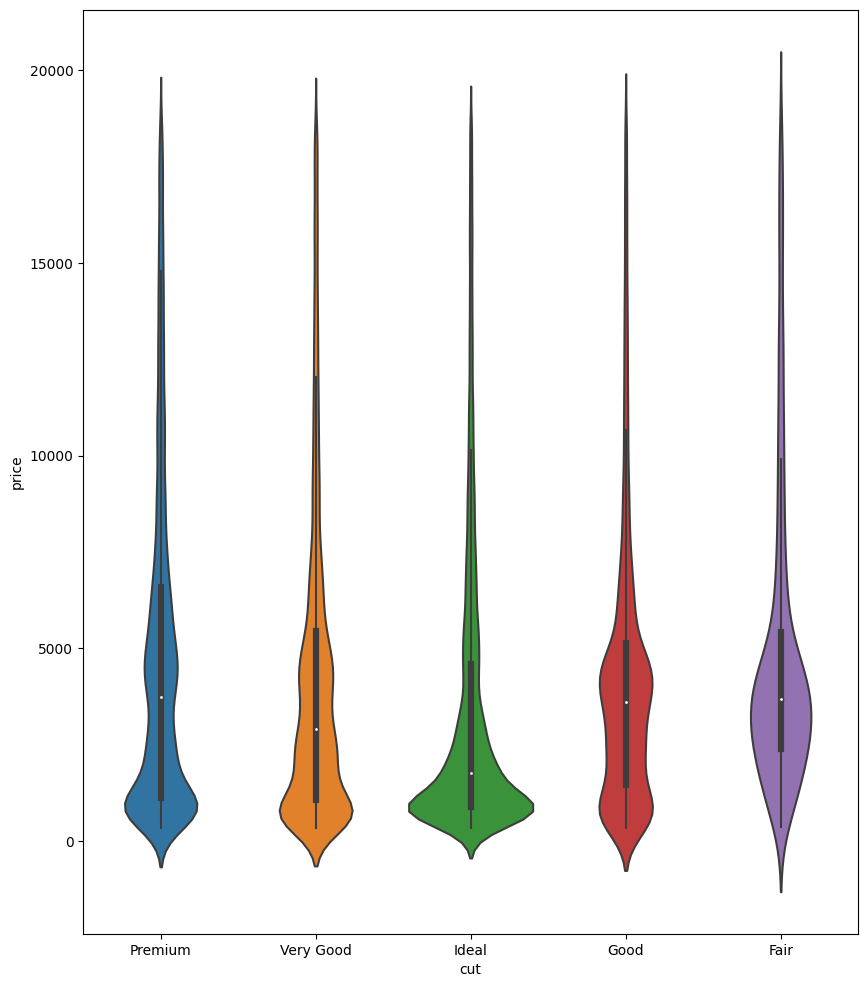

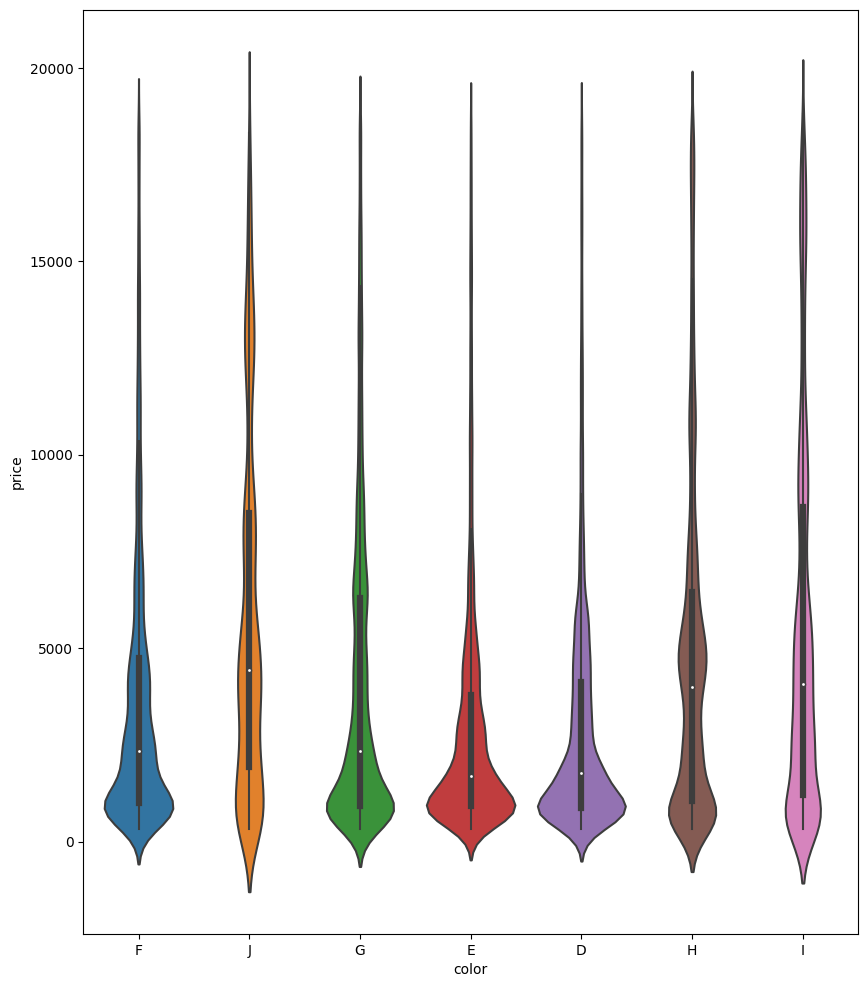

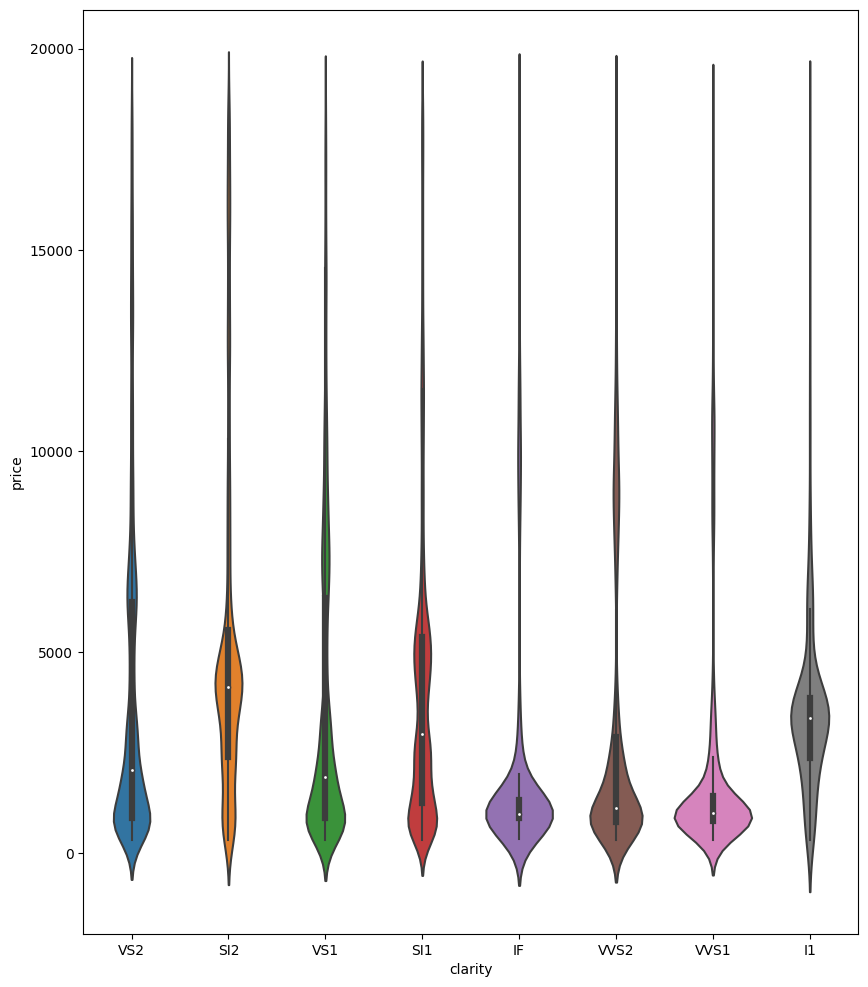

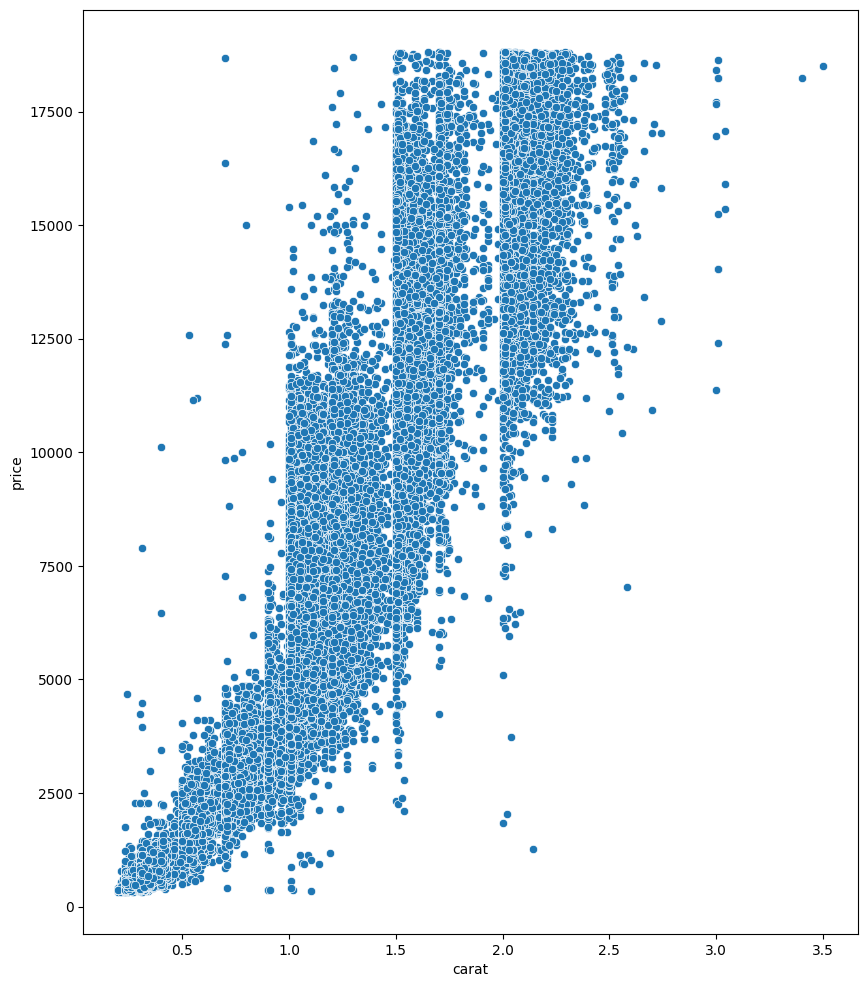

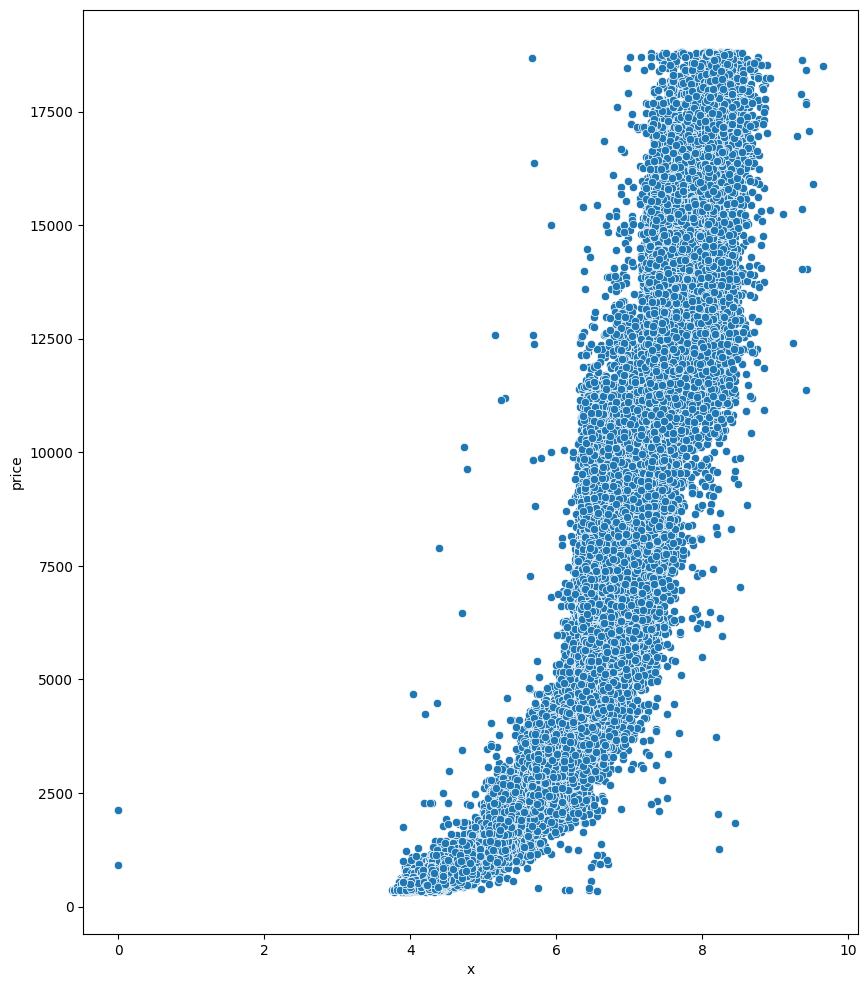

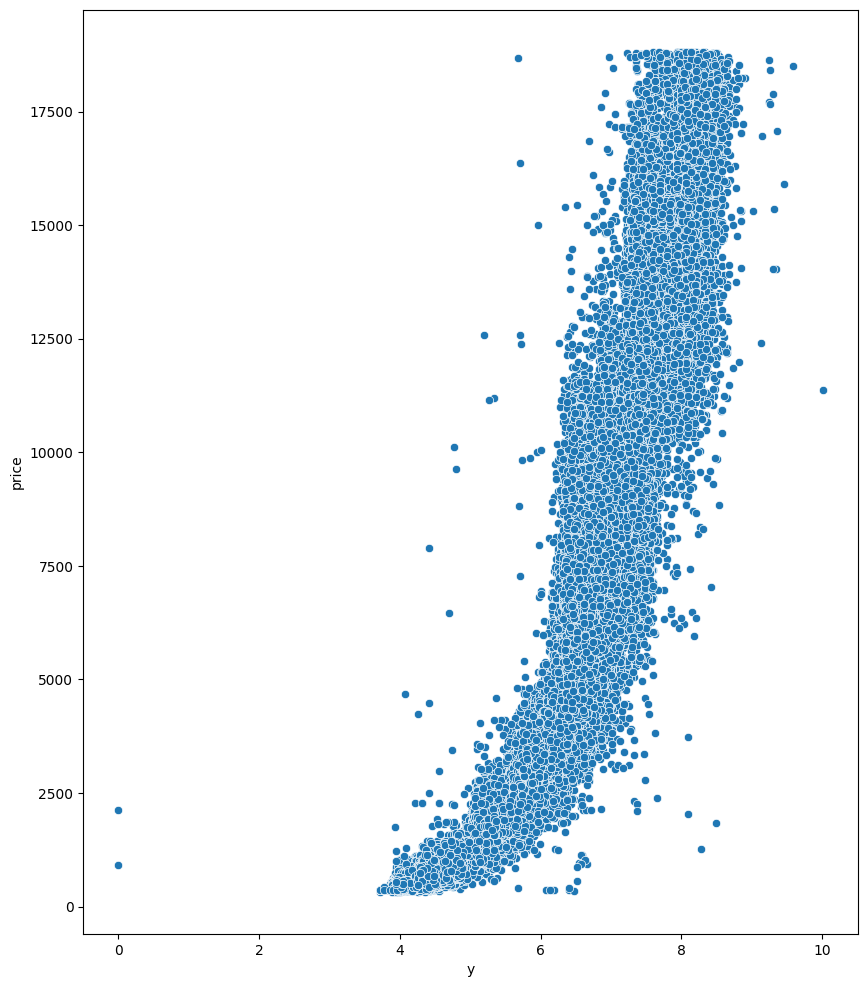

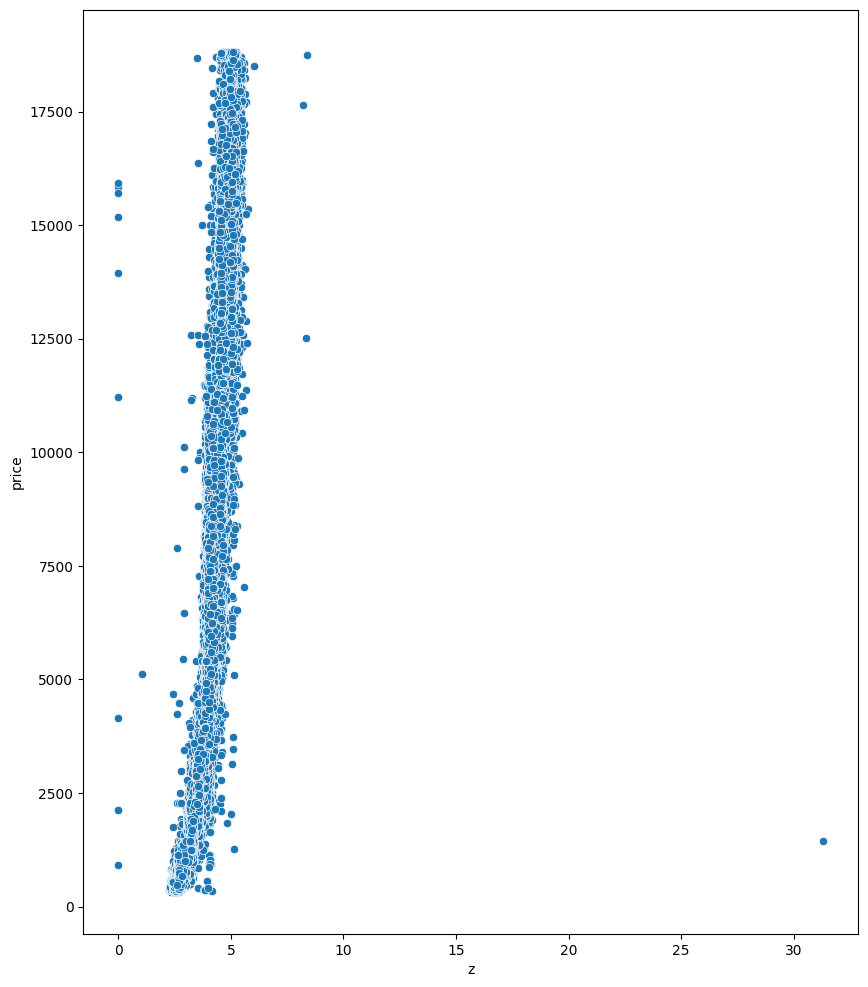

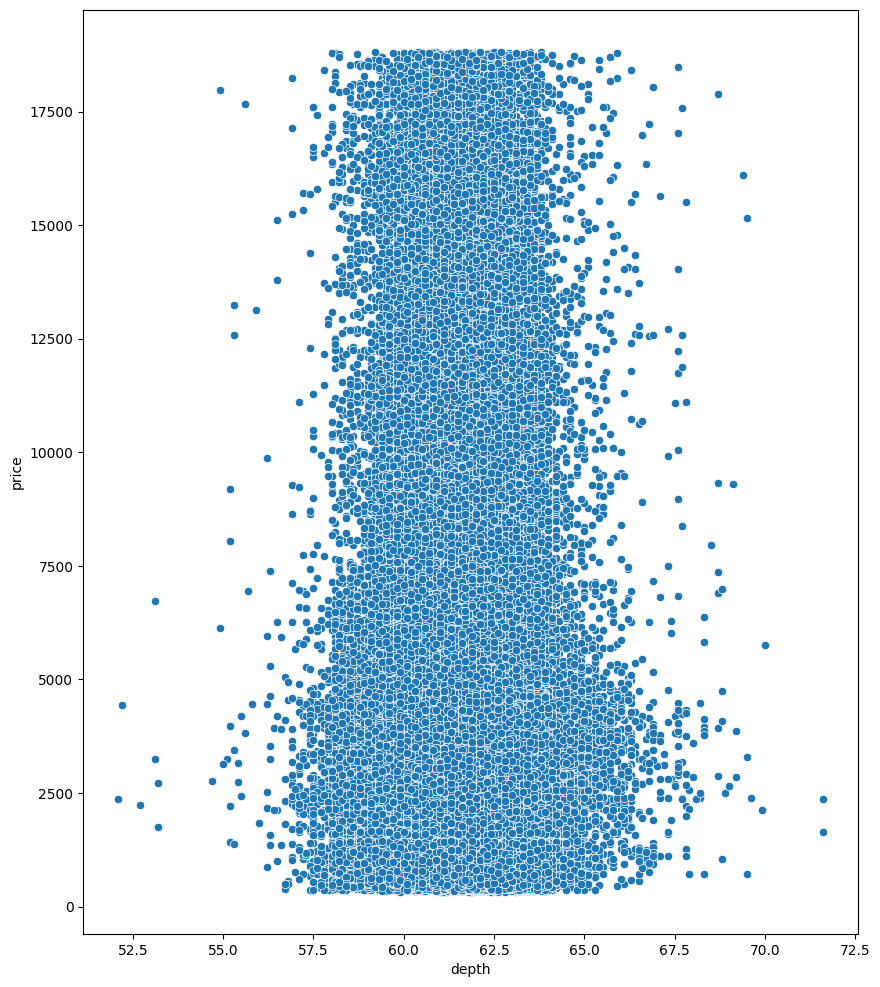

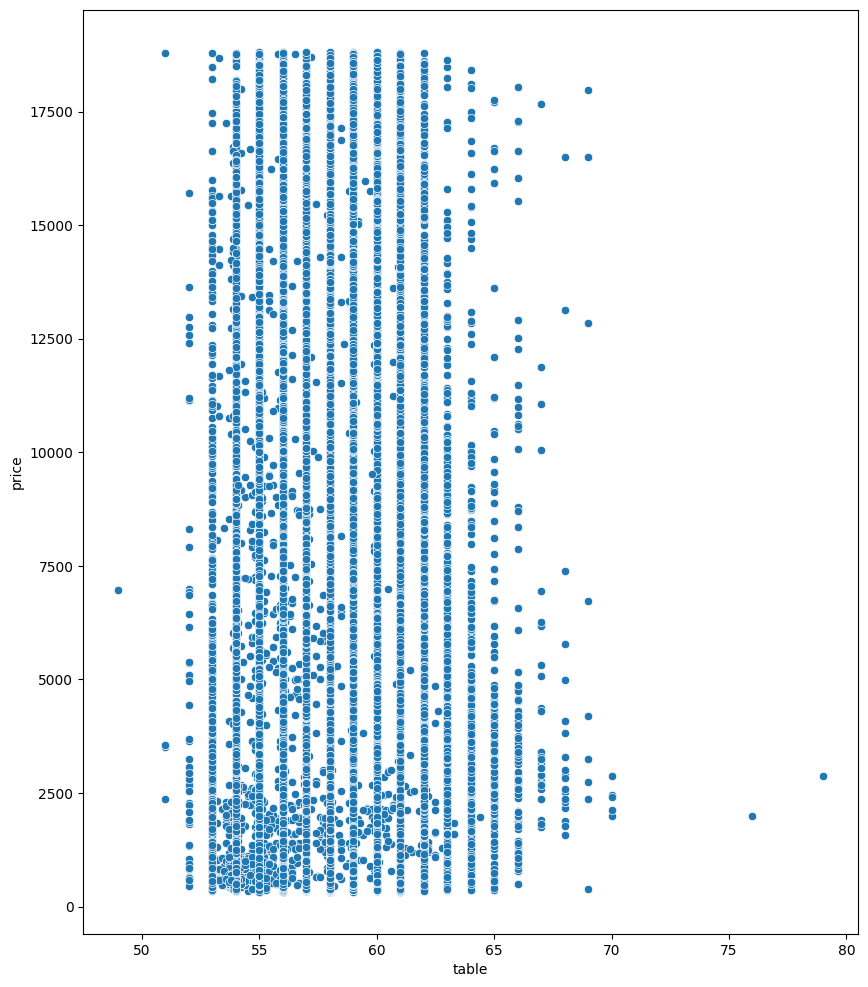

In [6]:
numerical=['carat', 'x', 'y', 'z', 'depth', 'table']
categorical=['cut', 'color', 'clarity']
for c in categorical:
    plt.figure(figsize=(10,12))
    sns.violinplot(data=train_df,x=c,y='price')
    plt.show()
for n in numerical:
    plt.figure(figsize=(10,12))
    sns.scatterplot(data=train_df,x=n,y='price')
    plt.show()

In [7]:
check_d=train_df[train_df['depth']>100].index
print(check_d)

Index([], dtype='int64')


In [8]:
check_t=train_df[train_df['table']>100].index
print(check_t)

Index([], dtype='int64')


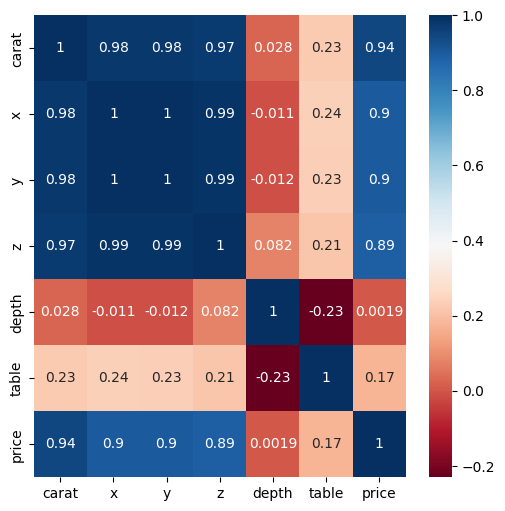

In [9]:
numerical_target=['carat', 'x', 'y', 'z', 'depth', 'table','price']
plt.figure(figsize=(6,6))
sns.heatmap(train_df[numerical_target].corr(),yticklabels=train_df[numerical_target].columns, xticklabels=train_df[numerical_target].columns,annot=True,cmap='RdBu')
plt.show()

Summing up the observations coming from the plots:
- all categorical values can be helpful in predicting the target value
- 'x','y','z','carat' are the most prominent in explaining the variance - the correlation is almost linear and the target increase with the increased value of these features
- 'table' and 'depth' seem not correlated that much with the target value, but we will not remove them, as 
- we have some outliers that should be deleted - these are 0 values for features 'x', 'y', 'z'
- 'table' and 'depth' values are correct - none of them exceeds 100
- all sizes-related feature ('x','y','z') are correlated with each other, but they are also highly correlated with the target; we will leave them for training and after checking the model's scores decide if next actions should be taken

In [10]:
filter_x=train_df[train_df['x']==0].index
train_df.drop(filter_x,inplace=True)

In [11]:
filter_y=train_df[train_df['y']==0].index
train_df.drop(filter_y,inplace=True)

In [12]:
filter_z=train_df[train_df['z']==0].index
train_df.drop(filter_z,inplace=True)

In [13]:
filter_carat=train_df[train_df['carat']>3.0].index
train_df.drop(filter_carat,inplace=True)

In [14]:
filter_depth=train_df[(train_df['depth']>70.0)&(train_df['depth']<55.00)].index
train_df.drop(filter_depth,inplace=True)

In [15]:
train_df.drop(columns=['id'],inplace=True)
test_df.drop(columns=['id'],inplace=True)

In [23]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X=train_df.drop(['price'],axis=1)
y=train_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=0)

scaler=StandardScaler()

numerical_transformer=Pipeline([("scaler",scaler)])
categorical_transformer=Pipeline([("encoder",OneHotEncoder(handle_unknown='ignore'))])
transformer=ColumnTransformer(transformers=[('categorical',categorical_transformer, categorical),('numerical',numerical_transformer,numerical)])
pipeline=Pipeline([('transformer',transformer),('model',AdaBoostRegressor())])

params={'model__n_estimators':[50,100,200,500],'model__learning_rate':[0.1, 0.3, 0.5, 0.7, 1.0]}
gsearch1=GridSearchCV(pipeline,param_grid=params,scoring='neg_mean_squared_error')
gsearch1.fit(X_train, y_train)
print("The best parameters are:", gsearch1.best_params_)
model=gsearch1.best_estimator_
print(model.score(X_train,y_train))

The best parameters are: {'model__learning_rate': 0.1, 'model__n_estimators': 50}
0.9144625806435063


In [24]:
print(model.score(X_test,y_test))

0.9151125498401165


We will try to improve the performance of the model.